In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.89 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.5/107.7 GB disk)


In [ ]:
# 2. Cargamos las imágenes que usaremos para probar los modelos pre-cargados
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Minicky.jpeg
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa.jpeg
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato1.jpg
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato2.JPG
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato3.JPG
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/gato3.JPG
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/personas1.png
!wget https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/personas2.png

--2024-09-07 16:10:42--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Minicky.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213012 (208K) [image/jpeg]
Saving to: ‘Minicky.jpeg’

Minicky.jpeg        100%[===================>] 208.02K  --.-KB/s    in 0.004s  

2024-09-07 16:10:42 (51.2 MB/s) - ‘Minicky.jpeg’ saved [213012/213012]

--2024-09-07 16:10:42--  https://raw.githubusercontent.com/LuisAngelOlveraOlvera/YoloExamples/main/ImageTestYolo/Pelusa.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

In [ ]:
from ultralytics import YOLO
import os

# cargar el modelo pre - entrentrenado
model = YOLO('yolov8s.pt')

# Realizar una inferencia
results = model("personas2.png")

# Crear un directorio donde guardaremos la imagen
save_dir = "/content/YOLO-Pre-Trained-Results"
os.makedirs(save_dir, exist_ok=True)

# Acceder al primer resultado de la lista
result = results[0]

#Guardar los resultados de la inferencia con una extensión válida (ejemplo png, jpg)
file_path = os.path.join(save_dir, "personas_results.jpg")
result.save(file_path)

# Verificar si la imagen ha sido guardado o no
if os.path.exists(file_path):
    print(f"La imagen se ha guardado en: {file_path}")
else:
    print("No se ha podido guardar la imagen.")



image 1/1 /content/personas2.png: 320x640 7 persons, 1 baseball bat, 114.7ms
Speed: 1.9ms preprocess, 114.7ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)
La imagen se ha guardado en: /content/YOLO-Pre-Trained-Results/personas_results.jpg


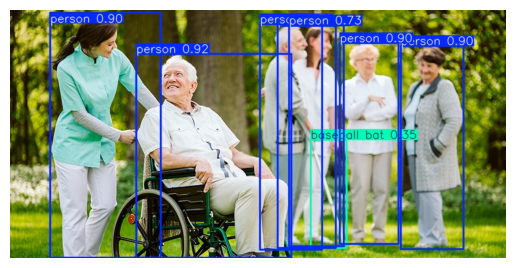

In [ ]:
import matplotlib.pyplot as plt
import cv2

resultado_inferencia = "/content/YOLO-Pre-Trained-Results/personas_results.jpg"

img = cv2.imread(resultado_inferencia)
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_color)
plt.axis("off")
plt.show()


In [ ]:
# Procesar 3 imágenes al mismo tiempo
from ultralytics import YOLO
import os

# cargar el modelo
modelo=YOLO("yolov8s.pt")

# Seleccionar las imágenes a procesar
imagenes = ["Minicky.jpeg", "Pelusa.jpeg", "personas1.png"]

# Crear carpeta
save_dir = "/content/YOLO-Pre-Trained-Results"
os.makedirs(save_dir, exist_ok=True)

# Ciclo for para hacer las inferencias
for img_path in imagenes:
  results=modelo(img_path)
  result = results[0]
  output_image_name = f"Resultado_{os.path.basename(img_path)}"
  output_image_path = os.path.join(save_dir, output_image_name)
  result.save(output_image_path)

    # Verificar si los resultados fueron guardados
  if os.path.exists(file_path):
      print(f"Imagen guardada correctamente en {file_path}")
  else:
      print("No se pudo guardar la imagen.")





image 1/1 /content/Minicky.jpeg: 640x480 1 cat, 430.6ms
Speed: 2.8ms preprocess, 430.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Imagen guardada correctamente en /content/YOLO-Pre-Trained-Results/personas_results.jpg

image 1/1 /content/Pelusa.jpeg: 640x480 1 cat, 2 chairs, 415.3ms
Speed: 2.7ms preprocess, 415.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Imagen guardada correctamente en /content/YOLO-Pre-Trained-Results/personas_results.jpg

image 1/1 /content/personas1.png: 448x640 17 persons, 405.6ms
Speed: 2.4ms preprocess, 405.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
Imagen guardada correctamente en /content/YOLO-Pre-Trained-Results/personas_results.jpg


(-0.5, 733.5, 501.5, -0.5)

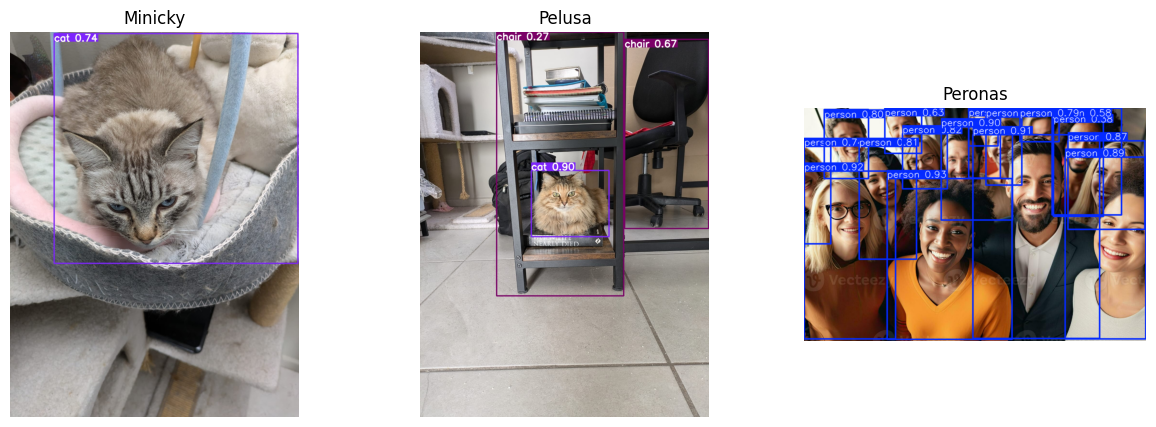

In [ ]:
# Primer método para visualizar imágenes (sin ciclo for)
import matplotlib.pyplot as plt
import cv2

inf_minicky = "/content/YOLO-Pre-Trained-Results/Resultado_Minicky.jpeg"
inf_pelusa = "/content/YOLO-Pre-Trained-Results/Resultado_Pelusa.jpeg"
inf_personas = "/content/YOLO-Pre-Trained-Results/Resultado_personas1.png"

img_minicky = cv2.imread(inf_minicky)
img_pelusa = cv2.imread(inf_pelusa)
img_personas = cv2.imread(inf_personas)

minicky_color = cv2.cvtColor(img_minicky, cv2.COLOR_BGR2RGB)
pelusa_color = cv2.cvtColor(img_pelusa, cv2.COLOR_BGR2RGB)
personas_color = cv2.cvtColor(img_personas, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].imshow(minicky_color)
axes[0].set_title("Minicky")
axes[0].axis("off")

axes[1].imshow(pelusa_color)
axes[1].set_title("Pelusa")
axes[1].axis("off")


axes[2].imshow(personas_color)
axes[2].set_title("Peronas")
axes[2].axis("off")

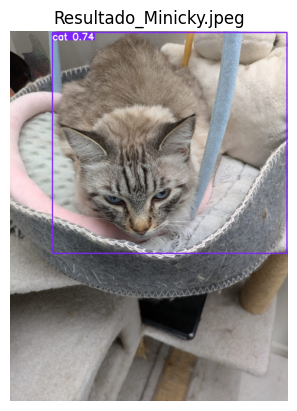

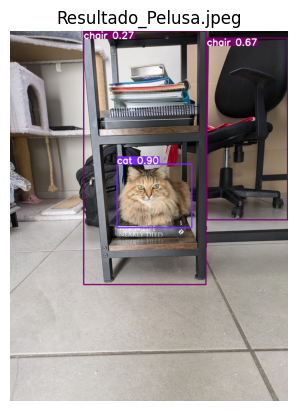

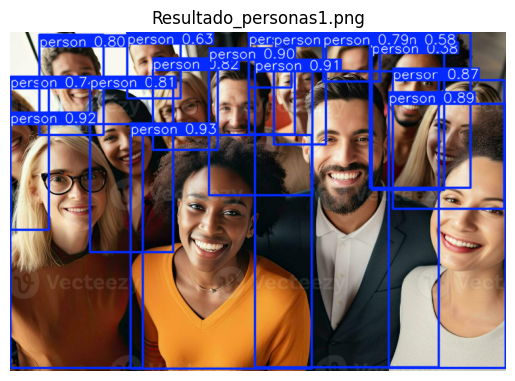

In [ ]:
# Segundo método de visualizar imágenes con ciclo for
import matplotlib.pyplot as plt
import cv2
import os

# Listado de imágenes a procesar
imagenes =[
    "/content/YOLO-Pre-Trained-Results/Resultado_Minicky.jpeg",
    "/content/YOLO-Pre-Trained-Results/Resultado_Pelusa.jpeg",
    "/content/YOLO-Pre-Trained-Results/Resultado_personas1.png"]

# Ciclo for para su visualización
for img_path in imagenes:
  img = cv2.imread(img_path)
  img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_color)
  plt.title(os.path.basename(img_path))
  plt.axis("off")
  plt.show()